# Pytorch 2. 数据集

我们首先要考虑的是我们的数据。在大多数教程中，为了直接进行神经网络的训练，这一点经常被忽略。但作为一个程序员，最大的任务之一就是预处理数据并以最容易让神经网络使用的方式对其进行格式化。虽然这是一个比较没有难度的时候，进行学习的大多数时间要么在收集和处理数据，要么在等神经网络的训练。所以，在开始讲解神经网络之前，先让我们进行数据处理。

## 1. 创建数据集

因为是学习用，所以这里的数据集选择一个现成的数据集： `torchvision`torchvision 是一个用于视觉任务的数据集。下面开始操作：

首先导入数据集的库：

In [10]:
# if you don't have torchvision, you can install it by:
# pip install torchvision

import torch
import torchvision
from torchvision import  transforms, datasets

下面我们使用 torchvision 来加载 MNIST 数据集，这是一个基于图像的数据集，显示 0-9 的手写数字，你的工作是编写一个神经网络来对它们进行分类。不过在此之前，我们先将数据此数据集分为 `train` 和 `test` 两个部分。在执行这个步骤的时候，我们需要将数据强制转换成 `tensor` 格式，方便 `pytorch` 处理。

In [11]:
train = datasets.MNIST(root='./data', train=True, transform=transforms.Compose([transforms.ToTensor()]), download=True)
test = datasets.MNIST(root='./data', train=False, transform=transforms.Compose([transforms.ToTensor()]), download=True)

将数据集分好后，我们会再将数据分组 (`batch_size=10`)，并且一组一组的喂给模型进行训练。之所以不将所有数据一次性都喂给机器是因为：

- 有时候数据集太大了，10+GB, 100+GB 的都有。但是通常 GPU 的 RAM 没有那么大
- 另外机器学习中最快的学习方法就是记忆。但是 RAM 是有限的，而测试时出现的情况几乎是无限的。所以让机械学习每次只读取少量的数据，可以让模型不断的调整其中的参数，从而达到对于一般情况都额能够准确识别的能力。

然后，在我们的训练数据集中，我们通常希望尽可能地随机打乱输入数据，希望数据中没有任何可能导致机器停机的模式。(`shuffle=True`) 防止在训练时出现连续多个数据都是同一个类别的情况，因为这样的情况容易让机器将所有图片都分到那个它经常见到的类别之中。

In [12]:
# batch_size is the number data we want to feed to the network each time
# shuffle make the model to learn the data in random order
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

## 2. 使用数据

好吧，我们有了数据，但我们如何使用它？

一个简单的操作是可以像这样迭代数据：

In [13]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

每次迭代将包含一批 10 个元素（这是我们选择的批量大小）和 10 个类。我们来看一下其中一个组数据：（data[0] 是一堆事物的特征，而 data[1] 是所有的目标。）

In [14]:
x, y = data[0][0], data[1][0]

print(y)

tensor(3)


如您所见， data[1] 只是一堆标签。因此，由于 data[1][0] 是 3，我们可以预期 data[0][0] 是 3 的图像。让我们看看！

In [15]:
import matplotlib.pyplot as plt

print(data[0][0].shape)
# This is a 28x28 image

torch.Size([1, 28, 28])


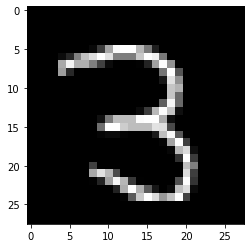

In [16]:
plt.imshow(data[0][0].view(28,28), cmap='gray')
plt.show()

下面我们来查看一下训练集中每一个标签都有多少数据。这里我使用了一个 词典 的数据结构来表示结果。

In [17]:
# Iterate through the dataset

# We want the dataset to be as balanced as possible

total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)]+=1
        total +=1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


## 3. 数据平衡

对于我们的模型来说，好的训练需要好的数据。数据平衡是其中一项指标。

想象一下，你有一个猫和狗的数据集。 7200 张图片是狗，1800 张是猫。 这是相当不平衡的。 分类器很可能会发现，通过简单的总是预测狗，它可以非常快速轻松地达到 72% 的准确率。 该模型极不可能从这种情况中恢复。

其他时候，这种不平衡并不那么严重，但仍然足以使模型几乎总是以某种方式预测，除非在最明显的情况下。 无论如何，如果我们能平衡数据集是最好的。

通过“平衡”，我的意思是确保训练中的每个分类都有相同数量的示例。

这个要做起来其实很简单，就是通过我们上一步的数据计数来完成。下面只是将比例打出来了，可以看出来，这个数据的分类还是比较均匀的。

In [19]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*10}")

0: 0.9871666666666666
1: 1.1236666666666668
2: 0.993
3: 1.0218333333333334
4: 0.9736666666666667
5: 0.9035
6: 0.9863333333333334
7: 1.0441666666666667
8: 0.9751666666666667
9: 0.9915
